In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import

In [92]:
def path(text):
    return os.path.join(*text.split("/"))

def annotate(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()/2),
                    ha='center', va='bottom', bbox={'color': 'white'})

In [23]:
RUNS_PATH = path('../runs')
RUN_ID = '2021-05-26_15-26-21'
RUN_PATH = os.path.join(RUNS_PATH, RUN_ID)

CLASSES = ['Ia', 'IIb', 'IIIb', 'Other']
STATS_COLS = ['precision', 'recall', 'f1-score', 'support']

In [6]:
reports = [e for e in os.listdir(RUN_PATH) if 'classification_report' in e]

In [65]:
report = pd.read_csv(os.path.join(RUN_PATH, reports[0]))
report.index=['precision', 'recall', 'f1-score', 'support']
report

,Ia,IIb,IIIb,Other,accuracy,macro avg,weighted avg
precision,1.0,1.0,0.60,1.000000,0.904762,0.900000,0.942857
recall,1.0,1.0,1.00,0.777778,0.904762,0.944444,0.904762
f1-score,1.0,1.0,0.75,0.875000,0.904762,0.906250,0.910714
support,6.0,3.0,3.00,9.000000,0.904762,21.000000,21.000000


In [55]:
report.iloc[0].accuracy

0.9047619047619048

In [57]:
def merge_reports(reports):
    accuracies = []
    multiindex = pd.MultiIndex.from_product([CLASSES, STATS_COLS], names=['classes', 'stats'])
    folds = []
    for report_name in reports:
        report = pd.read_csv(os.path.join(RUN_PATH, report_name))
        accuracies.append(report.iloc[0].accuracy)
        array = []
        for k in CLASSES:
            array.extend(report[k].values.tolist())
        folds.append(array)
    return pd.DataFrame(folds, columns=multiindex), accuracies

In [58]:
results, accuracies = merge_reports(reports)

In [99]:
np.mean(accuracies)

0.8814285714285715

In [59]:
results.head()

classes        Ia                               IIb                     \
stats   precision recall f1-score support precision    recall f1-score   
0             1.0    1.0      1.0     6.0       1.0  1.000000     1.00   
1             1.0    1.0      1.0     6.0       1.0  1.000000     1.00   
2             1.0    1.0      1.0     6.0       1.0  1.000000     1.00   
3             1.0    1.0      1.0     5.0       0.6  1.000000     0.75   
4             1.0    1.0      1.0     5.0       1.0  0.666667     0.80   

classes              IIIb                                 Other            \
stats   support precision    recall  f1-score support precision    recall   
0           3.0       0.6  1.000000  0.750000     3.0  1.000000  0.777778   
1           2.0       1.0  0.500000  0.666667     4.0  0.818182  1.000000   
2           2.0       1.0  0.500000  0.666667     4.0  0.818182  1.000000   
3           3.0       1.0  0.666667  0.800000     3.0  1.000000  0.888889   
4           3.0       0.6  1.000000  0.750000     3.0  0.875000  0.777778   

classes                    
stats    f1-score support  
0        0.875000     9.0  
1        0.900000     9.0  
2        0.900000     9.0  
3        0.941176     9.0  
4        0.823529     9.0

In [60]:
[precisions, recalls, fscores, supports] = [results.xs(stat_name, axis=1, level='stats') for stat_name in STATS_COLS]

In [96]:
np.std(precisions['Ia'])

0.09147320339189784

In [98]:
results.drop(columns='support', level='stats').std().unstack()

stats,precision,recall,f1-score
classes,,,
IIIb,0.173925,0.210819,0.095813
IIb,0.183384,0.235702,0.171810
Ia,0.096421,0.063246,0.060973
Other,0.094405,0.117121,0.059415


In [94]:
results.drop(columns='support', level='stats').mean().unstack()

stats,precision,recall,f1-score
classes,,,
IIIb,0.895000,0.766667,0.789048
IIb,0.886667,0.833333,0.826667
Ia,0.957143,0.980000,0.964530
Other,0.892955,0.888889,0.882392


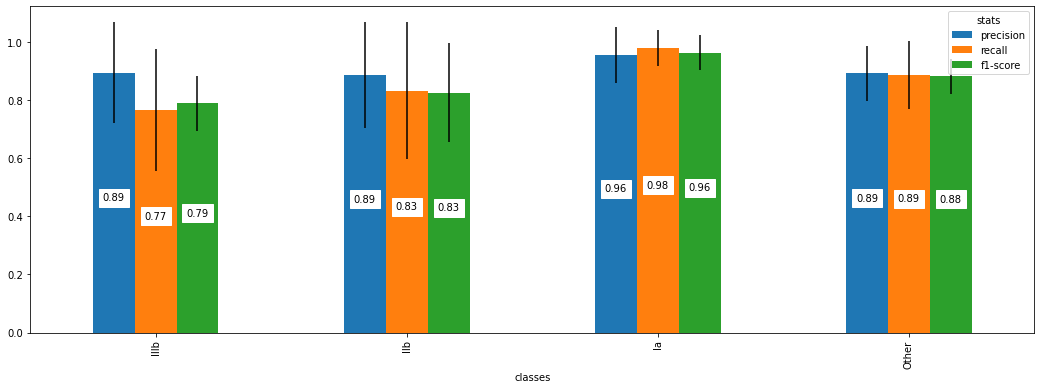

In [93]:
group = results.drop(columns='support', level='stats')
ax = group.mean().unstack().plot(kind='bar', figsize=(18, 6), yerr=group.std().unstack())
annotate(ax)